In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


✅ Data Loaded Successfully: (10000, 12)
   customer_id  age      gender             city         job_role  \
0      1940815   33      Female  North Elizabeth            Sales   
1     12657432   36  Non-binary         Smithton  Product Manager   
2     10174833   40  Non-binary     Jasonchester  Product Manager   
3     16497775   27  Non-binary       Port Donna         Designer   
4      6164702   38  Non-binary      Port Joshua       Consultant   

  employment_type   income  credit_score  savings_rate  existing_loan_balance  \
0        Contract   861023           532          0.12                  67524   
1        Salaried  1675477           794          0.12                 414187   
2       Freelance  1937555           600          0.10                   3476   
3       Freelance  1518608           668          0.06                 999132   
4        Salaried   657724           362          0.51                  22795   

   account_balance joined_date  
0           301366  2022-

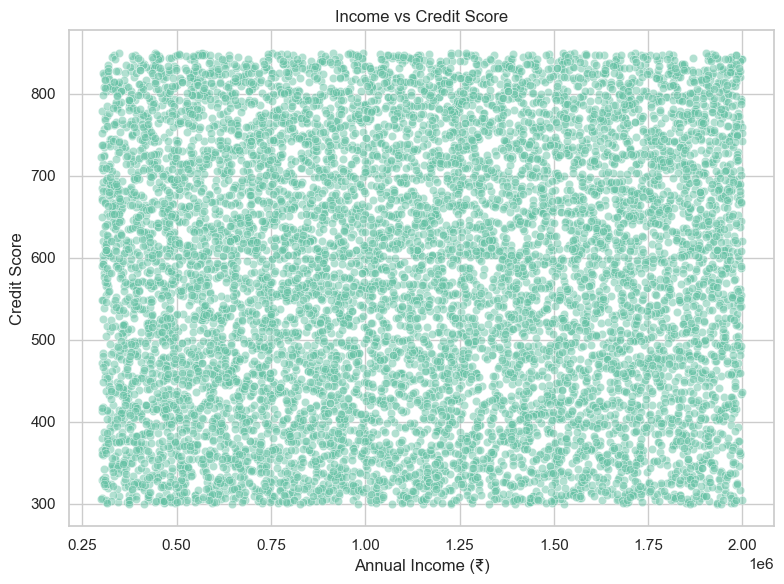

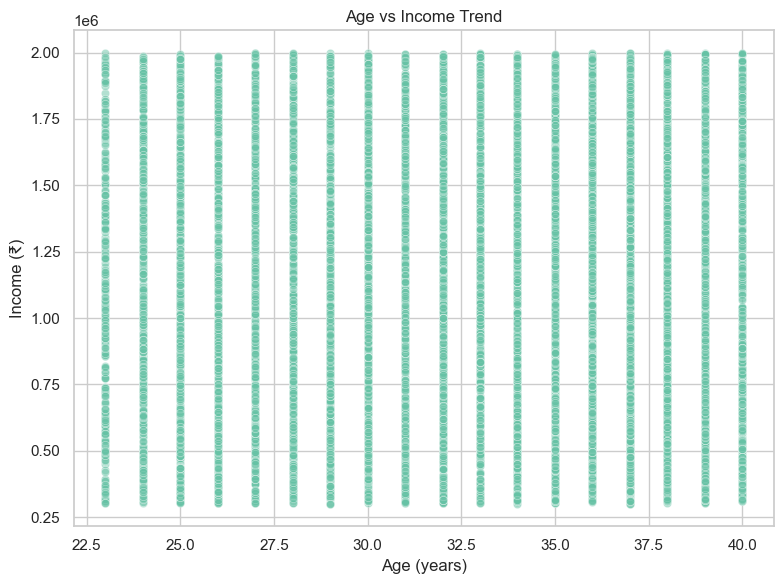

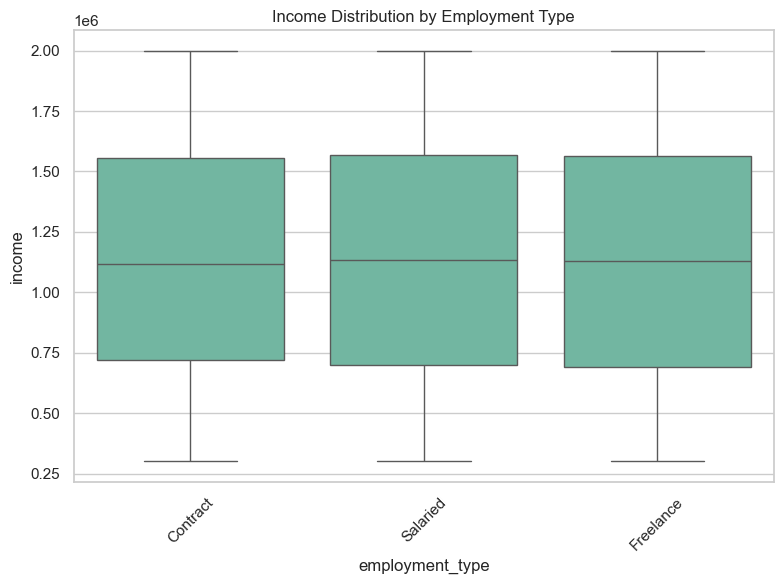

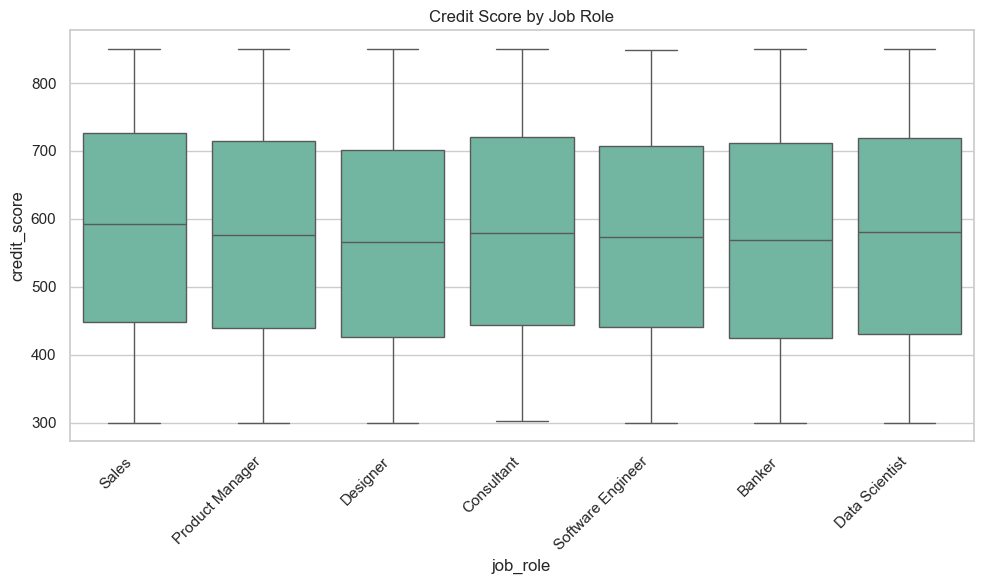

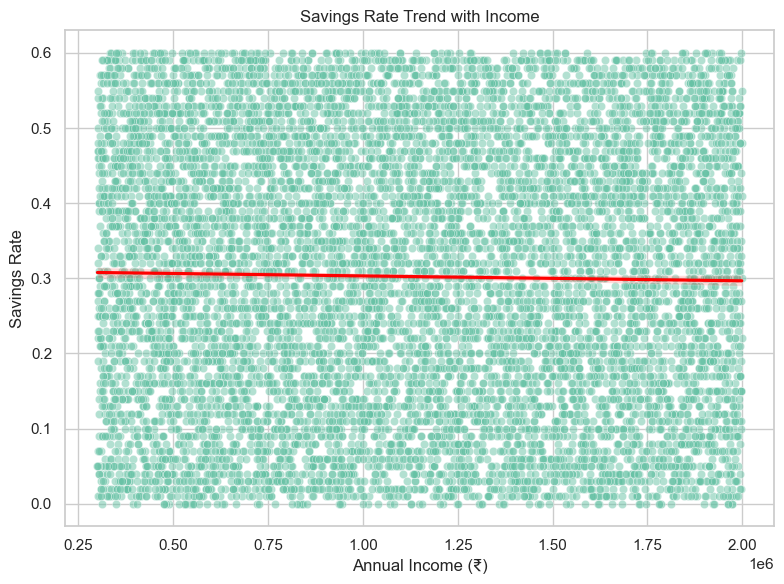

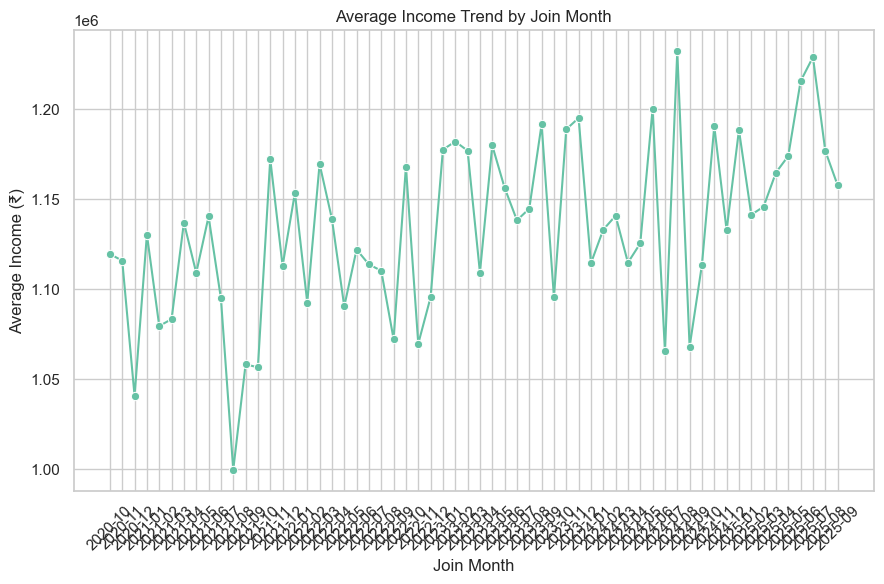

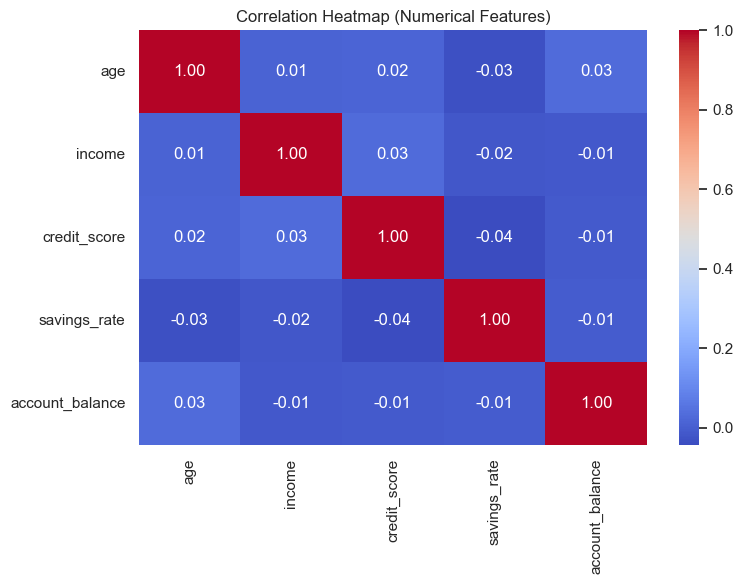

✅ All analysis visuals generated and saved successfully.


In [3]:
# hma_customer_analysis.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display + style
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8,6)

# ---------- Load Data ----------
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads", "synthetic_data")
file_path = os.path.join(DOWNLOADS_DIR, "customers_hma_10000.csv")
customers = pd.read_csv(file_path, parse_dates=['joined_date'])

print("✅ Data Loaded Successfully:", customers.shape)
print(customers.head())

# ---------- Basic Summary ----------
print("\n📊 Data Summary:")
print(customers.describe())

# ---------- Scatter Plots ----------
# 1. Income vs Credit Score
plt.figure()
sns.scatterplot(data=customers, x='income', y='credit_score', alpha=0.5)
plt.title("Income vs Credit Score")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.savefig("income_vs_credit_score.png", dpi=300)
plt.show()

# 2. Age vs Income
plt.figure()
sns.scatterplot(data=customers, x='age', y='income', alpha=0.5)
plt.title("Age vs Income Trend")
plt.xlabel("Age (years)")
plt.ylabel("Income (₹)")
plt.tight_layout()
plt.savefig("age_vs_income.png", dpi=300)
plt.show()

# ---------- Box Plots ----------
# Distribution of income by employment type
plt.figure()
sns.boxplot(data=customers, x='employment_type', y='income')
plt.title("Income Distribution by Employment Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("income_by_employment_type.png", dpi=300)
plt.show()

# Credit score distribution by job role
plt.figure(figsize=(10,6))
sns.boxplot(data=customers, x='job_role', y='credit_score')
plt.title("Credit Score by Job Role")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("credit_score_by_job_role.png", dpi=300)
plt.show()

# ---------- Trend Analysis ----------
# Relationship between income and savings rate
plt.figure()
sns.scatterplot(data=customers, x='income', y='savings_rate', alpha=0.5)
sns.regplot(data=customers, x='income', y='savings_rate', scatter=False, color='red')
plt.title("Savings Rate Trend with Income")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Savings Rate")
plt.tight_layout()
plt.savefig("savings_rate_trend.png", dpi=300)
plt.show()

# ---------- Time Series Analysis ----------
# Join Date Trends
customers['joined_month'] = customers['joined_date'].dt.to_period('M')
monthly_join = customers.groupby('joined_month')['income'].mean().reset_index()
monthly_join['joined_month'] = monthly_join['joined_month'].astype(str)

plt.figure(figsize=(9,6))
sns.lineplot(data=monthly_join, x='joined_month', y='income', marker='o')
plt.xticks(rotation=45)
plt.title("Average Income Trend by Join Month")
plt.xlabel("Join Month")
plt.ylabel("Average Income (₹)")
plt.tight_layout()
plt.savefig("income_trend_by_join_date.png", dpi=300)
plt.show()

# ---------- Optional: Correlation Heatmap ----------
plt.figure(figsize=(8,6))
corr = customers[['age','income','credit_score','savings_rate','account_balance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

print("✅ All analysis visuals generated and saved successfully.")


In [5]:
# hma_customer_analysis.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# ----------------- Setup -----------------
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8, 6)

# Directories
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads")
SYNTHETIC_DATA_DIR = os.path.join(DOWNLOADS_DIR, "synthetic_data")
OUTPUT_DIR = os.path.join(DOWNLOADS_DIR, "customer_analysis_plots")

# Create output folder if not exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Timestamp to prevent overwriting old plots
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# ----------------- Load Data -----------------
file_path = os.path.join(SYNTHETIC_DATA_DIR, "customers_hma_10000.csv")
customers = pd.read_csv(file_path, parse_dates=['joined_date'])

print(f"✅ Data Loaded: {customers.shape[0]} rows, {customers.shape[1]} columns")

# ----------------- Scatter Plots -----------------
# 1. Income vs Credit Score
plt.figure()
sns.scatterplot(data=customers, x='income', y='credit_score', alpha=0.5)
plt.title("Income vs Credit Score")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"income_vs_credit_score_{timestamp}.png"), dpi=300)
plt.close()

# 2. Age vs Income
plt.figure()
sns.scatterplot(data=customers, x='age', y='income', alpha=0.5)
plt.title("Age vs Income Trend")
plt.xlabel("Age (years)")
plt.ylabel("Annual Income (₹)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"age_vs_income_{timestamp}.png"), dpi=300)
plt.close()

# ----------------- Box Plots -----------------
# 3. Income by Employment Type
plt.figure()
sns.boxplot(data=customers, x='employment_type', y='income')
plt.title("Income Distribution by Employment Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"income_by_employment_type_{timestamp}.png"), dpi=300)
plt.close()

# 4. Credit Score by Job Role
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers, x='job_role', y='credit_score')
plt.title("Credit Score by Job Role")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"credit_score_by_job_role_{timestamp}.png"), dpi=300)
plt.close()

# ----------------- Trend Analysis -----------------
# 5. Savings Rate vs Income
plt.figure()
sns.scatterplot(data=customers, x='income', y='savings_rate', alpha=0.5)
sns.regplot(data=customers, x='income', y='savings_rate', scatter=False, color='red')
plt.title("Savings Rate Trend with Income")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Savings Rate")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"savings_rate_trend_{timestamp}.png"), dpi=300)
plt.close()

# ----------------- Time Series Analysis -----------------
# Ensure 'joined_date' exists
if 'joined_date' in customers.columns:
    customers['joined_month'] = customers['joined_date'].dt.to_period('M')
    monthly_income = customers.groupby('joined_month')['income'].mean().reset_index()
    monthly_income['joined_month'] = monthly_income['joined_month'].astype(str)

    plt.figure(figsize=(9, 6))
    sns.lineplot(data=monthly_income, x='joined_month', y='income', marker='o')
    plt.xticks(rotation=45)
    plt.title("Average Income Trend by Join Month")
    plt.xlabel("Join Month")
    plt.ylabel("Average Income (₹)")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, f"income_trend_by_join_date_{timestamp}.png"), dpi=300)
    plt.close()

# ----------------- Correlation Heatmap -----------------
numeric_cols = ['age', 'income', 'credit_score', 'savings_rate', 'account_balance']
numeric_cols = [col for col in numeric_cols if col in customers.columns]

if numeric_cols:
    plt.figure(figsize=(8, 6))
    corr = customers[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap (Numerical Features)")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, f"correlation_heatmap_{timestamp}.png"), dpi=300)
    plt.close()

print(f"✅ All analysis plots successfully saved to:\n{OUTPUT_DIR}")


✅ Data Loaded: 10000 rows, 12 columns
✅ All analysis plots successfully saved to:
C:\Users\user\Downloads\customer_analysis_plots


In [6]:
# faker_customer_analysis.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# ----------------- Setup -----------------
sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (8, 6)

# Directories
DOWNLOADS_DIR = os.path.join(os.path.expanduser("~"), "Downloads")
SYNTHETIC_DATA_DIR = os.path.join(DOWNLOADS_DIR, "synthetic_data")
OUTPUT_DIR = os.path.join(DOWNLOADS_DIR, "faker_customer_analysis_plots")

# Create output folder if not exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Timestamp to prevent overwriting old plots
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# ----------------- Load Data -----------------
file_path = os.path.join(SYNTHETIC_DATA_DIR, "customers.csv")
customers = pd.read_csv(file_path, parse_dates=['joined_date'])

print(f"✅ Data Loaded: {customers.shape[0]} rows, {customers.shape[1]} columns")

# ----------------- Scatter Plots -----------------
# 1. Income vs Credit Score
plt.figure()
sns.scatterplot(data=customers, x='income', y='credit_score', alpha=0.6)
plt.title("Income vs Credit Score (Faker Customers)")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"income_vs_credit_score_{timestamp}.png"), dpi=300)
plt.close()

# 2. Age vs Income
plt.figure()
sns.scatterplot(data=customers, x='age', y='income', alpha=0.6)
plt.title("Age vs Income Trend (Faker Customers)")
plt.xlabel("Age (years)")
plt.ylabel("Annual Income (₹)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"age_vs_income_{timestamp}.png"), dpi=300)
plt.close()

# ----------------- Box Plots -----------------
# 3. Income by Employment Type
plt.figure()
sns.boxplot(data=customers, x='employment_type', y='income')
plt.title("Income Distribution by Employment Type (Faker Customers)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"income_by_employment_type_{timestamp}.png"), dpi=300)
plt.close()

# 4. Credit Score by Job Role
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers, x='job_role', y='credit_score')
plt.title("Credit Score by Job Role (Faker Customers)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"credit_score_by_job_role_{timestamp}.png"), dpi=300)
plt.close()

# ----------------- Trend Analysis -----------------
# 5. Savings Rate vs Income
plt.figure()
sns.scatterplot(data=customers, x='income', y='savings_rate', alpha=0.6)
sns.regplot(data=customers, x='income', y='savings_rate', scatter=False, color='red')
plt.title("Savings Rate Trend with Income (Faker Customers)")
plt.xlabel("Annual Income (₹)")
plt.ylabel("Savings Rate")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, f"savings_rate_trend_{timestamp}.png"), dpi=300)
plt.close()

# ----------------- Time Series Analysis -----------------
if 'joined_date' in customers.columns:
    customers['joined_month'] = customers['joined_date'].dt.to_period('M')
    monthly_income = customers.groupby('joined_month')['income'].mean().reset_index()
    monthly_income['joined_month'] = monthly_income['joined_month'].astype(str)

    plt.figure(figsize=(9, 6))
    sns.lineplot(data=monthly_income, x='joined_month', y='income', marker='o')
    plt.xticks(rotation=45)
    plt.title("Average Income Trend by Join Month (Faker Customers)")
    plt.xlabel("Join Month")
    plt.ylabel("Average Income (₹)")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, f"income_trend_by_join_date_{timestamp}.png"), dpi=300)
    plt.close()

# ----------------- Correlation Heatmap -----------------
numeric_cols = ['age', 'income', 'credit_score', 'savings_rate', 'account_balance']
numeric_cols = [col for col in numeric_cols if col in customers.columns]

if numeric_cols:
    plt.figure(figsize=(8, 6))
    corr = customers[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap (Faker Customers)")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, f"correlation_heatmap_{timestamp}.png"), dpi=300)
    plt.close()

print(f"✅ All analysis plots successfully saved to:\n{OUTPUT_DIR}")


✅ Data Loaded: 2000 rows, 12 columns
✅ All analysis plots successfully saved to:
C:\Users\user\Downloads\faker_customer_analysis_plots
